<a href="https://colab.research.google.com/github/hackveda-canada/Data-Science-Essentials/blob/master/Data_Science_Essentials_Day_14_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Day 11**
----------------

#**N-GRAMS**
----------------


an n-gram is continous sequence of n items from a given sample of text or speech.

We will be using nltk Python library, and collections library to use Counter function

In [1]:
# Concepts of N-grams in Text Analytics
from nltk.util import ngrams
from collections import Counter

text = "Welcome to Machine Learning"

import nltk
nltk.download("punkt")
from nltk import word_tokenize

def get_ngrams(text, n):
  tokens = word_tokenize(text)
  print(tokens)
  n_grams = ngrams(tokens, n)
  return [" ".join(gram) for gram in n_grams]
  
 
  
  
print("Unigram (n=1)",get_ngrams(text, 1))
print("Bigram (n=2)",get_ngrams(text, 2))
print("Trigram (n=3)",get_ngrams(text, 3))
print("Quadgram (n=4)",get_ngrams(text, 4))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['Welcome', 'to', 'Machine', 'Learning']
Unigram (n=1) ['Welcome', 'to', 'Machine', 'Learning']
['Welcome', 'to', 'Machine', 'Learning']
Bigram (n=2) ['Welcome to', 'to Machine', 'Machine Learning']
['Welcome', 'to', 'Machine', 'Learning']
Trigram (n=3) ['Welcome to Machine', 'to Machine Learning']
['Welcome', 'to', 'Machine', 'Learning']
Quadgram (n=4) ['Welcome to Machine Learning']


Extract n-grams from text and create a table repersenting n-grams and its frequency

In [2]:
text = "Statistics skills, and programming skills are equally important for analytics. Statistics skills, and domain knowledge are important for analytics"

# Remove noise = punctuation marks (string.punctuation)

import string

# Define a function remove the punctuation
def remove_punctuation(text):
  tokens = word_tokenize(text)
  nf_text = [token for token in tokens if token.lower() not in string.punctuation]
  return " ".join(nf_text)


print(remove_punctuation(text))

text = remove_punctuation(text)

  
  


Statistics skills and programming skills are equally important for analytics Statistics skills and domain knowledge are important for analytics


**Extract n-grams**

In [3]:
result = get_ngrams(text, 2)
print(result)

['Statistics', 'skills', 'and', 'programming', 'skills', 'are', 'equally', 'important', 'for', 'analytics', 'Statistics', 'skills', 'and', 'domain', 'knowledge', 'are', 'important', 'for', 'analytics']
['Statistics skills', 'skills and', 'and programming', 'programming skills', 'skills are', 'are equally', 'equally important', 'important for', 'for analytics', 'analytics Statistics', 'Statistics skills', 'skills and', 'and domain', 'domain knowledge', 'knowledge are', 'are important', 'important for', 'for analytics']


In [4]:
# Count the frequency of n-grams
request_count = Counter(result)
request_count

Counter({'Statistics skills': 2,
         'analytics Statistics': 1,
         'and domain': 1,
         'and programming': 1,
         'are equally': 1,
         'are important': 1,
         'domain knowledge': 1,
         'equally important': 1,
         'for analytics': 2,
         'important for': 2,
         'knowledge are': 1,
         'programming skills': 1,
         'skills and': 2,
         'skills are': 1})

Convert result dictionary into 2-D Dataframe

In [5]:
import pandas as pd
df = pd.DataFrame.from_dict(request_count, orient="index")
df


,0
Statistics skills,2
skills and,2
and programming,1
programming skills,1
skills are,1
are equally,1
equally important,1
important for,2
for analytics,2
analytics Statistics,1


**Rename DataFrame column name**

In [6]:
# from dataframe, we will use rename function to rename column names
df.rename(columns={'index':'N-grams', 0:'Frequency'})

,Frequency
Statistics skills,2
skills and,2
and programming,1
programming skills,1
skills are,1
are equally,1
equally important,1
important for,2
for analytics,2
analytics Statistics,1


In [7]:
import os

!mkdir demo
!wget "http://www.hackveda.in/text1.txt"
!wget "http://www.hackveda.in/text2.txt"
!wget "http://www.hackveda.in/text3.txt"

!mv text1.txt text2.txt text3.txt demo/
!cd demo/
!ls demo/

for f in os.listdir("demo"):
  print(f)

--2019-03-18 12:55:41--  http://www.hackveda.in/text1.txt
Resolving www.hackveda.in (www.hackveda.in)... 192.185.129.82
Connecting to www.hackveda.in (www.hackveda.in)|192.185.129.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142 [text/plain]
Saving to: ‘text1.txt’

text1.txt           100%[===================>]     142  --.-KB/s    in 0s      

2019-03-18 12:55:41 (20.8 MB/s) - ‘text1.txt’ saved [142/142]

--2019-03-18 12:55:42--  http://www.hackveda.in/text2.txt
Resolving www.hackveda.in (www.hackveda.in)... 192.185.129.82
Connecting to www.hackveda.in (www.hackveda.in)|192.185.129.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150 [text/plain]
Saving to: ‘text2.txt’

text2.txt           100%[===================>]     150  --.-KB/s    in 0s      

2019-03-18 12:55:42 (21.6 MB/s) - ‘text2.txt’ saved [150/150]

--2019-03-18 12:55:43--  http://www.hackveda.in/text3.txt
Resolving www.hackveda.in (www.hackveda.in)... 192.185.129.8

#**Day 12**
-------------


**Bag of Words**
-----------------------------

Bag of Words =  Counting the occurance of words in a document

No importance of grammer and order of words


#**Term Document Matrix**
---------------------------------



In [8]:
#Term Document Matrix

import pandas as pd
#sklearn libraries feature extraction is used to extract text tokens
from sklearn.feature_extraction.text import CountVectorizer


# Function to create a dictionary with key as file, and values as names
def CorpusFromDir(dir_path):
  result = dict(docs = [open(os.path.join(dir_path, f)).read() for f in 
  os.listdir(dir_path)], ColNames = map(lambda x: x, os.listdir(dir_path)))
  return result


docs = CorpusFromDir("demo")
docs



{'ColNames': <map at 0x7fb712742a20>,
 'docs': ['\ufeffAfter India carried out pre-dawn "non-military, pre-emptive air strikes" across the Line of Control on Tuesday to target the biggest camp of terror',
  '\ufeffThe air strike on terror camps in Pakistan is a positive for the markets as it illustrates a "decisiveness" in foreign policy and increases',
  '\ufeffThe U.S. military said on Monday that a recent air strike in central Somalia killed 35 al Shabaab fighters.']}

In [9]:
# CountVectorizer = Convert a collection of text documents to a matrix of token counts
#CountVectorizer()

vectorizer = CountVectorizer()
doc_vec = vectorizer.fit_transform(docs.get('docs'))
doc_vec

<3x50 sparse matrix of type '<class 'numpy.int64'>'
	with 60 stored elements in Compressed Sparse Row format>

In [10]:
# Create a DataFrame
df = pd.DataFrame(doc_vec.toarray().transpose(), index=vectorizer.get_feature_names())
df

# Display the file names
df.columns = docs.get('ColNames')
df

,text2.txt,text1.txt,text3.txt
35,0,0,1
across,1,0,0
after,1,0,0
air,1,1,1
al,0,0,1
and,0,1,0
as,0,1,0
biggest,1,0,0
camp,1,0,0
camps,0,1,0


In [11]:
!ls demo/

text1.txt  text2.txt  text3.txt


#Day 13:

# Term Frequency / Inverse Document Frequency (TF*IDF)
#(using Vectorizer)
Term Frequency =  (Number of times term appears in a document / Total number of terms in the document)
Document Frequency = (Number od documents containing a given term/the size of the collection of the documents)
Inverse Document Frequency (IDF) = (Total number of document)/Number of documents

In [12]:
# Term Frequency - Inverse Document Frequency (using Vectorizer)
# Term Frequency =  (Number of times term appears in a document / Total number of terms in the document)
# Document Frequency = (Number od documents containing a given term/the size of the collection of the documents)

'''The TF (term frequency) of a word is the frequency of a word (i.e. number of times it appears) in a document. When you know it, you're able to see if you're using a term too much or too little. The IDF (inverse document frequency) of a word is the measure of how significant that term is in the whole corpus

https://www.elephate.com/blog/what-is-tf-idf/

TF*IDF is used by search engines to better understand content which is undervalued. 
For example, if you’d want to search a term “Coke” on Google, this is how Google can figure out if a page titled “COKE” is about:

a) Coca-Cola.
b) Cocaine.
c) A solid, carbon-rich residue derived from the distillation of crude oil.
d) A county in Texas.

'''

# Inverse Document Frequency (IDF) = (Total number of document)/Number of documents with a given term)

# Let's say we have total # of words in a document is 100, and ML appeared only 3
# Doc = 100 (ML = 3)
#TF = 3/100 = 0.03

total_number_words = 100
number_ml_words = 70
term_freq = number_ml_words/ total_number_words
print(term_freq)

0.7


In [13]:
# Calculation of document frequency on any search
number_of_docs_containing_given_term = 6
total_number_docs = 10

#calculate the document frequency
doc_freq = number_of_docs_containing_given_term/ total_number_docs
print(doc_freq)

'''Once we get DF, now we have to normalize the document-frequency so as to have
the values represented on same scale

Now, we are going to normalize using log() function, if we get negative value, we need to
utilize the inverse of Document Frequncy (IDF) to avoid negative outcome of normalization

IDF = log(total number of documents / number of docs with given term)

TF-IDF (Term Frequency * Inverse Document Frequency) = (0-1)
The value near to 1 will be more relevant e.g., 0.8 is far relevent than 0.3'''



print(term_freq * doc_freq)

0.6
0.42


In [0]:
#!cat demo/text1.txt
#!cat demo/text2.txt

In [15]:
# Now Python solution for TF/IDF

from sklearn.feature_extraction.text import TfidfVectorizer
# read each and every documents, out of the doc it will extract all contents, then will
# calculate document frequency, IDF, and normalize
vectorizer  = TfidfVectorizer()

# call Corpus from dir function to read content from current working directory
docs = CorpusFromDir("/content/demo/")
docs


{'ColNames': <map at 0x7fb7126962b0>,
 'docs': ['\ufeffAfter India carried out pre-dawn "non-military, pre-emptive air strikes" across the Line of Control on Tuesday to target the biggest camp of terror',
  '\ufeffThe air strike on terror camps in Pakistan is a positive for the markets as it illustrates a "decisiveness" in foreign policy and increases',
  '\ufeffThe U.S. military said on Monday that a recent air strike in central Somalia killed 35 al Shabaab fighters.']}

In [16]:
# Vectorizer will learn the vocabulary and idf, return term-document matrix.
doc_term_matrix = vectorizer.fit_transform(docs.get('docs'))
#doc_term_matrix.toarray()
term_doc_matrix = doc_term_matrix.toarray().transpose()

# columns are documents and terms are rows now after transpose, and the values are IDF


# check the total number of terms
terms = vectorizer.get_feature_names()


#Lets create a dataframe
df = pd.DataFrame(term_doc_matrix, index=terms)
#df

#Lets tag the column names 

df.columns  = docs.get('ColNames')
df

,text2.txt,text1.txt,text3.txt
35,0.000000,0.000000,0.269370
across,0.191566,0.000000,0.000000
after,0.191566,0.000000,0.000000
air,0.113142,0.133531,0.159094
al,0.000000,0.000000,0.269370
and,0.000000,0.226088,0.000000
as,0.000000,0.226088,0.000000
biggest,0.191566,0.000000,0.000000
camp,0.191566,0.000000,0.000000
camps,0.000000,0.226088,0.000000


#Day 14:

#DATA EXPLORATION

 Data Exploration = To create visualizations using word count, frequencies etc to identify hidden patterns in dataset

1. Frequency Plot

  a. Data Frame ix
  
  b. Numpy Library (arrange)
  
  c. Matplotlib (Graphs)
  
  
 2. Lexical Dispersion Plot (e.g. https://qm2awesome.files.wordpress.com/2015/01/alvarado2.png)

In [17]:
# Data Exploration = To create visualizations using word count, frequencies etc to identify
#hidden patterns in data

#1. Frequency Plot
#a. data frame ix
#b. numpy library (arrange)
#c. matplotlib (Graphs)


#check all the keywords in dataframe and store in a variable (words)
words = df.index
words


#?df.ix :A primarily label-location based indexer, with integer position fallback.
# identify values on indexes by passign labels

# slice all indexes using :, and column position
#df.ix[:]
#df.ix[:,0]
#df.ix[:,1]

#Now perform sorting
#sort() was deprecated for DataFrames in favor of needing to user either sort_values() 
#to sort by column(s), or sort_index() to sort by the index.
#df.ix[:,0].sort_index(ascending=False, inplace=False)


frequecy = df.ix[:,0].sort_values(ascending=False, inplace=False)
words = frequecy.index


# Use numpy to calculate the length and position the words
import numpy as np

#arange([start,] stop[, step,], dtype=None)
#Return evenly spaced values within a given interval.

pos = np.arange(len(words))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


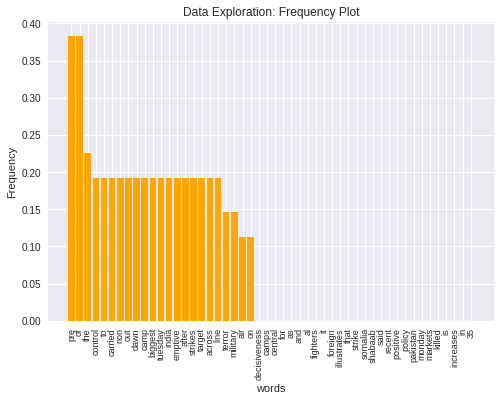

In [18]:
# Now generate frequency plot

import matplotlib.pyplot as plt
ax = plt.axes(frameon=True)

# ticks are values on x-axis and y-axis
ax.set_xticks(pos)


# we will get # of frames (as frameon = True) or words
# Rotation will help in readabilty
ax.set_xticklabels(words, rotation='vertical',fontsize=9)

# Now create bars on plot
# width argument value is width of bars as ,0.5/1.0/
plt.bar(pos, frequecy, color='orange')
ax.set_title("Data Exploration: Frequency Plot")
ax.set_xlabel("words")
ax.set_ylabel("Frequency")
plt.show()

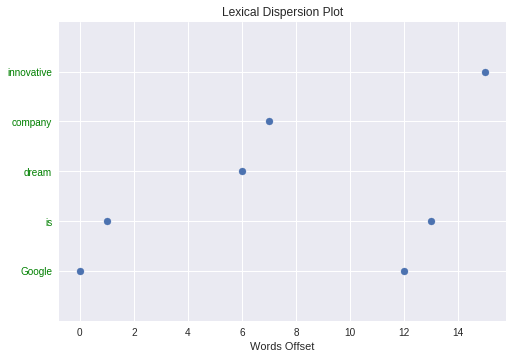

In [19]:
# Lexical Dispersion Plot = identify sequence of words in sentences
text = "Google is one of my favorite dream company to work for. Google is quite innovative in technology"

from nltk import  word_tokenize

def dispersion_plot(text, words):
  words_tokens = word_tokenize(text)
  # Lets draw the point on x,y axis for words
  points = [(x,y) for x in range(len(words_tokens)) for y in range(len(words)) 
            if words_tokens[x] == words[y]]
  
  # 
  if(points):
    #zip(): 
    x,y = zip(*points)
  else:
    x=y=()
  #plt.plot(x, y, "x")
  plt.scatter(x,y)
  plt.yticks(range(len(words)), words, color ="green")
  #ylim : Get or set the y-limits of the current axes, in our graph we have 5 words
  plt.ylim(-1, len(words))
  plt.title("Lexical Dispersion Plot")
  plt.xlabel("Words Offset")
  plt.show()
  

  
dispersion_plot(text, ['Google','is','dream','company','innovative'])

In [20]:
# Co-occurence Plot
import statsmodels.api as sm
import scipy.sparse as sp
docs = CorpusFromDir("demo1")

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [21]:
# default unigram model
count_model = CountVectorizer(ngram_range=(1,1))
# docs.get('docs')
docs_unigram = count_model.fit_transform(docs.get('docs'))
docs_unigram

<3x15 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [0]:
# Create a co-occurence matrix using docs_unigram
docs_unigram_matrix = (docs_unigram.T * docs_unigram) 

# Set same words to 0
docs_unigram_matrix.setdiag(0)

In [0]:
# Set the diagonals to NAN
# diags = sp.diags(1./docs_unigram_matrix.diagonal())

In [0]:
# Normalize the co-occurence matrix
# docs_unigram_matrix_norm = diags * docs_unigram_matrix

In [25]:
#df = pd.DataFrame(docs_unigram_matrix_norm.todense(), index=count_model.get_feature_names())
df = pd.DataFrame(docs_unigram_matrix.todense(), index=count_model.get_feature_names())
# docs_unigram_matrix_norm.todense()
df

df.columns = count_model.get_feature_names()
df

,analytics,and,are,books,domain,equally,for,important,knowledge,like,programming,reading,skills,statistics,travelling
analytics,0,2,2,0,1,1,2,2,1,0,1,0,3,2,0
and,2,0,2,1,1,1,2,2,1,1,1,1,3,2,1
are,2,2,0,0,1,1,2,2,1,0,1,0,3,2,0
books,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
domain,1,1,1,0,0,0,1,1,1,0,0,0,1,1,0
equally,1,1,1,0,0,0,1,1,0,0,1,0,2,1,0
for,2,2,2,0,1,1,0,2,1,0,1,0,3,2,0
important,2,2,2,0,1,1,2,0,1,0,1,0,3,2,0
knowledge,1,1,1,0,1,0,1,1,0,0,0,0,1,1,0
like,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1


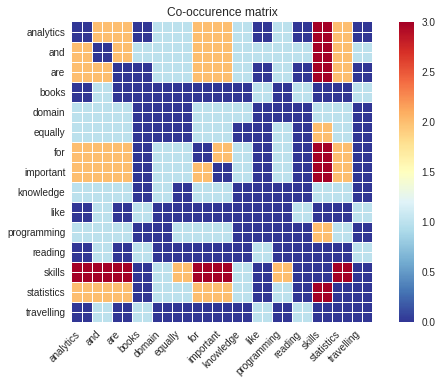

In [26]:
# Plot the co-occurence matrix
sm.graphics.plot_corr(df, title="Co-occurence matrix", xnames=list(df.index))
plt.show()